In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

In [4]:
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

#print(X)
#print(y)


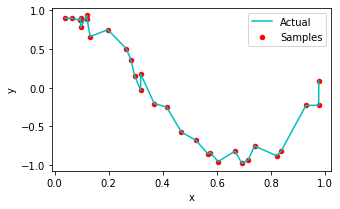

In [5]:
plt.figure(figsize=(5, 3))
plt.plot(X, y, color='c', label="Actual")
plt.scatter(X, y, color='r', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()


In [6]:
x1 = np.linspace(0, 1, 100)
x1 = x1[:, np.newaxis]
print(x1.shape)
print(x1)


(100, 1)
[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]
 [0.05050505]
 [0.06060606]
 [0.07070707]
 [0.08080808]
 [0.09090909]
 [0.1010101 ]
 [0.11111111]
 [0.12121212]
 [0.13131313]
 [0.14141414]
 [0.15151515]
 [0.16161616]
 [0.17171717]
 [0.18181818]
 [0.19191919]
 [0.2020202 ]
 [0.21212121]
 [0.22222222]
 [0.23232323]
 [0.24242424]
 [0.25252525]
 [0.26262626]
 [0.27272727]
 [0.28282828]
 [0.29292929]
 [0.3030303 ]
 [0.31313131]
 [0.32323232]
 [0.33333333]
 [0.34343434]
 [0.35353535]
 [0.36363636]
 [0.37373737]
 [0.38383838]
 [0.39393939]
 [0.4040404 ]
 [0.41414141]
 [0.42424242]
 [0.43434343]
 [0.44444444]
 [0.45454545]
 [0.46464646]
 [0.47474747]
 [0.48484848]
 [0.49494949]
 [0.50505051]
 [0.51515152]
 [0.52525253]
 [0.53535354]
 [0.54545455]
 [0.55555556]
 [0.56565657]
 [0.57575758]
 [0.58585859]
 [0.5959596 ]
 [0.60606061]
 [0.61616162]
 [0.62626263]
 [0.63636364]
 [0.64646465]
 [0.65656566]
 [0.66666667]
 [0.67676768]
 [0.68686869]
 [0.6969697 ]
 [0.7070707

In [7]:
model = LinearRegression()
model.fit(X[:, np.newaxis], y)
y_pred = model.predict(x1)

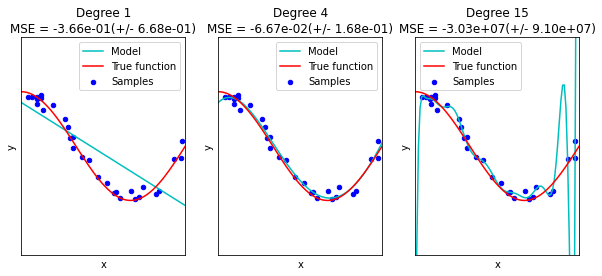

In [9]:
plt.figure(figsize=(10, 4))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
        # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    y_poly_pred = pipeline.predict(X_test[:, np.newaxis])
    plt.plot(X_test, y_poly_pred, color='c', label="Model")
    plt.plot(X_test, true_fun(X_test), color='r', label="True function")
    plt.scatter(X, y, color='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], scores.mean(), scores.std()))
plt.show()
